<a href="https://colab.research.google.com/github/RashelGarg/Exploratory-Data-Analysis/blob/main/EDA_Th_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#https://github.com/RashelGarg/Exploratory-Data-Analysis

# RASHEL GARG 21BDS0331
#EDA THEORY DA

# **Module 2: Data Transformation**

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/telco customer churn.csv')
df


customerID  gender  SeniorCitizen Partner Dependents tenure  \
0     7590-VHVEG  Female            0.0     Yes         No      1   
1     5575-GNVDE    Male            0.0      No         No     34   
2     3668-QPYBK    Male            0.0      No         No      2   
3     7795-CFOCW    Male            0.0      No         No     45   
4     9237-HQITU  Female            0.0      No         No      2   
...          ...     ...            ...     ...        ...    ...   
7038  6840-RESVB    Male            0.0     Yes        Yes     24   
7039  2234-XADUH  Female            0.0     Yes        Yes     72   
7040  4801-JZAZL  Female            0.0     Yes        Yes     11   
7041  8361-LTMKD    Male            1.0     Yes         No      4   
7042  3186-AJIEK    Male            0.0      No         No     66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [26]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')


<ipython-input-9-6f0276a5ed6a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


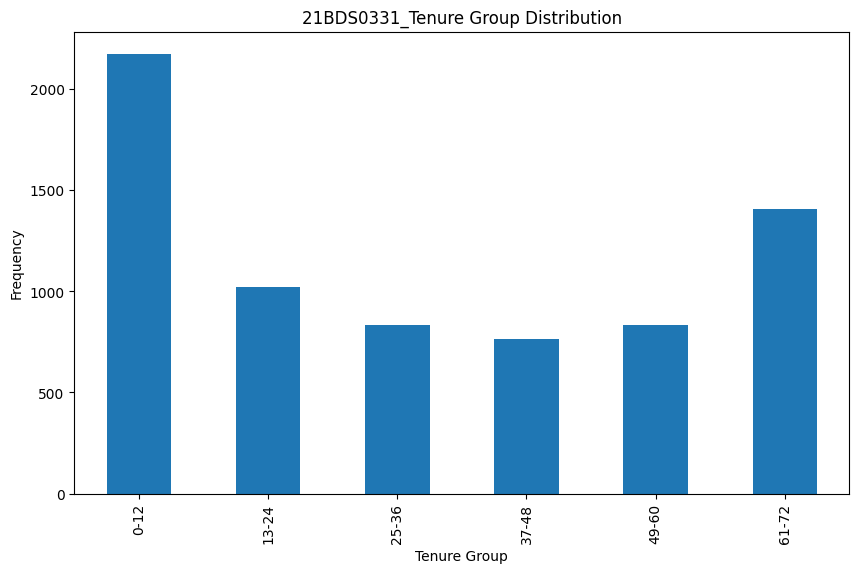

In [9]:
import matplotlib.pyplot as plt
# Convert 'TotalCharges' and 'tenure' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Replace missing values in 'TotalCharges' with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Data deduplication
df = df.drop_duplicates()

# Discretization (e.g., binning 'tenure' into categories)
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                              labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Visualization of tenure_group distribution
plt.figure(figsize=(10, 6))
df['tenure_group'].value_counts().sort_index().plot(kind='bar')
plt.title("21BDS0331_Tenure Group Distribution")
plt.xlabel("Tenure Group")
plt.ylabel("Frequency")
plt.show()

In [15]:
# View basic structure and summary
print(df.info())
print(df.describe())

#Performing data deduplication

df.duplicated()

# Now, we can drop these duplicates using the drop_duplicates() method:
print(df.shape)
df1 = df.drop_duplicates()
print(df1)
print("Shape Of Data Set After Dropping Duplicates:")
print(df1.shape)



# Check for duplicates
duplicates = df.duplicated().sum()

# Drop duplicate rows
data_deduplicated = df.drop_duplicates()
print(f"Number of duplicates removed: {duplicates}")

# Checking for missing data
missing_data = data_deduplicated.isnull().sum()
print(missing_data)
# Fill missing numerical data with mean
data_deduplicated.fillna(data_deduplicated.mean(numeric_only=True), inplace=True)
print(data_deduplicated)
# Fill missing categorical data with mode
for column in data_deduplicated.select_dtypes(include=['object']).columns:
    data_deduplicated[column].fillna(data_deduplicated[column].mode()[0], inplace=True)

# Check missing data after filling
data_deduplicated.isnull().sum()

df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7035 non-null   float64 
 3   Partner           7038 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7041 non-null   float64 
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

<ipython-input-15-476b7188cd29>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_deduplicated[column].fillna(data_deduplicated[column].mode()[0], inplace=True)


customerID            object
gender                object
SeniorCitizen        float64
Partner               object
Dependents            object
tenure               float64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
dtype: object

# **Module 3: Correlation Analysis and Time Series Analysis**

## ***1. Univariate Analysis***

***a. Histplot***




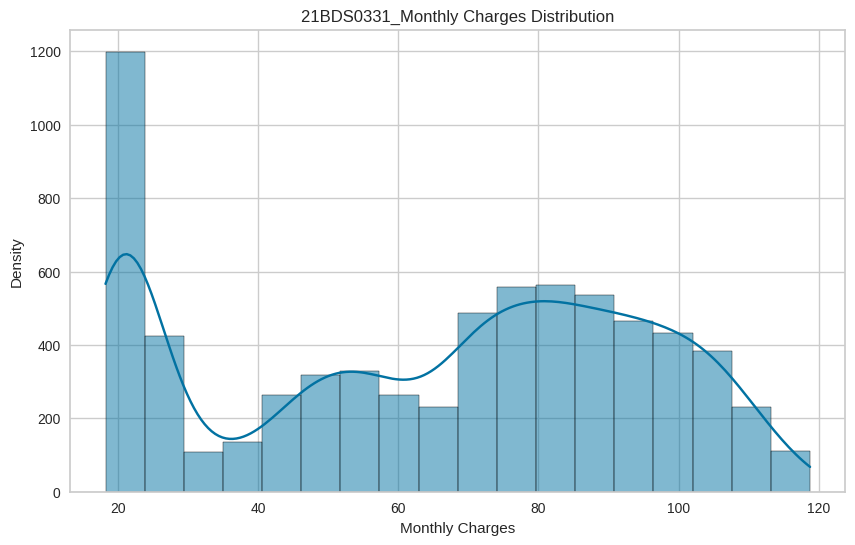

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis of Monthly Charges- Histplot
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("21BDS0331_Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()



***b. Box Plot***

In [ ]:
# Univariate Analysis of Total Charges (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title("21BDS0331_Total Charges Box Plot")
plt.xlabel("Total Charges")
plt.show()


***c. Count Plot- Churn***

<ipython-input-42-5a0917b11d76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette="Set2")


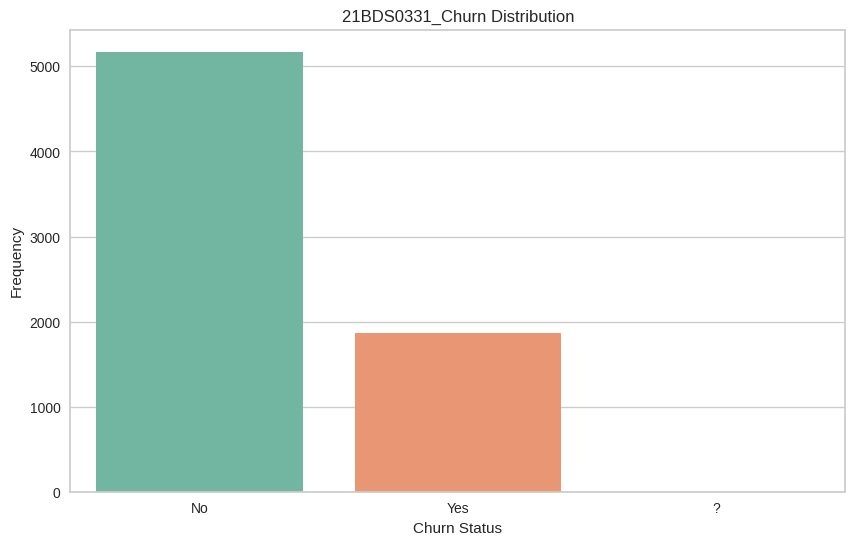

In [42]:
# Univariate Analysis of Churn (Count Plot for Categorical Variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df, palette="Set2")
plt.title("21BDS0331_Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Frequency")
plt.show()

***d. Count plot- Payment***

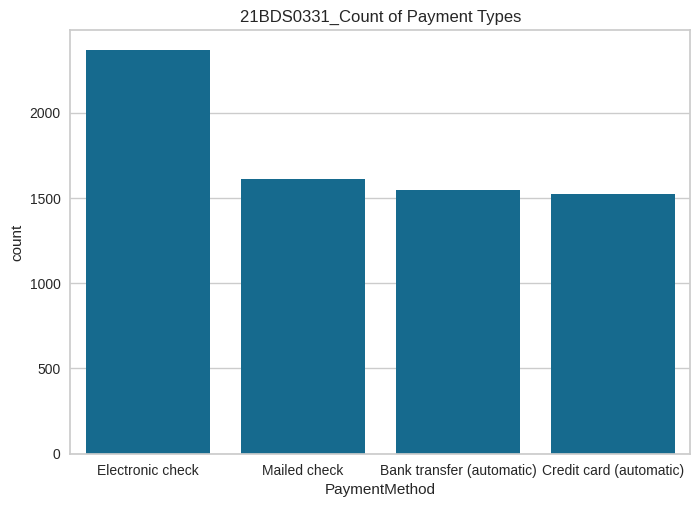

In [33]:
sns.countplot(x='PaymentMethod', data=df)
plt.title('21BDS0331_Count of Payment Types')
plt.show()

***e. Violin plot***

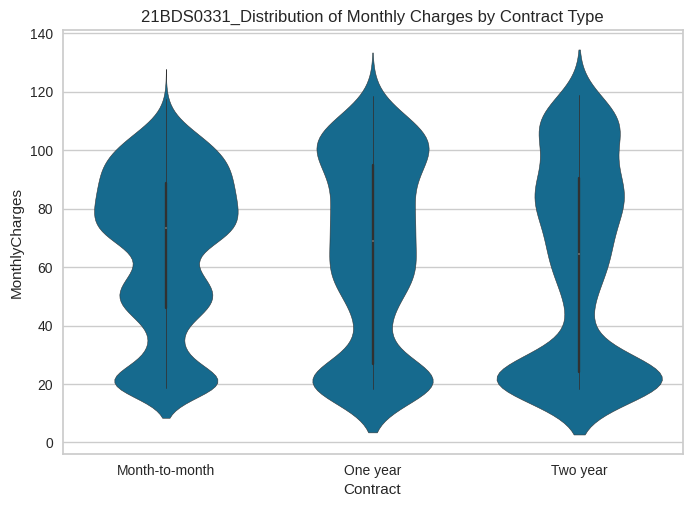

In [34]:
# Violin Plot for numerical distribution by category
sns.violinplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('21BDS0331_Distribution of Monthly Charges by Contract Type')
plt.show()


***f. Pie Chart (Churn)***

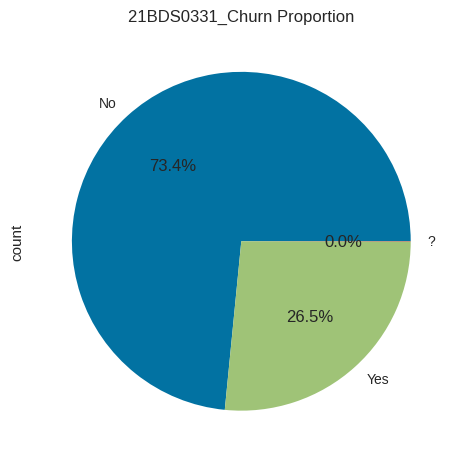

In [35]:

# Pie Chart for categorical proportions (e.g., 'Churn')
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('21BDS0331_Churn Proportion')
plt.show()

***g. Density plot***

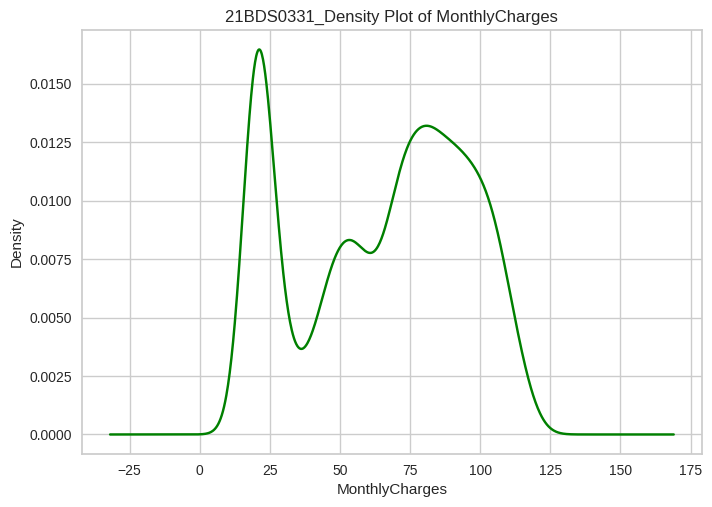

In [46]:
# Density plot for risk
df['MonthlyCharges'].plot(kind='kde', color='green')
plt.title('21BDS0331_Density Plot of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.show()


## ***2. Bivariate Analysis***

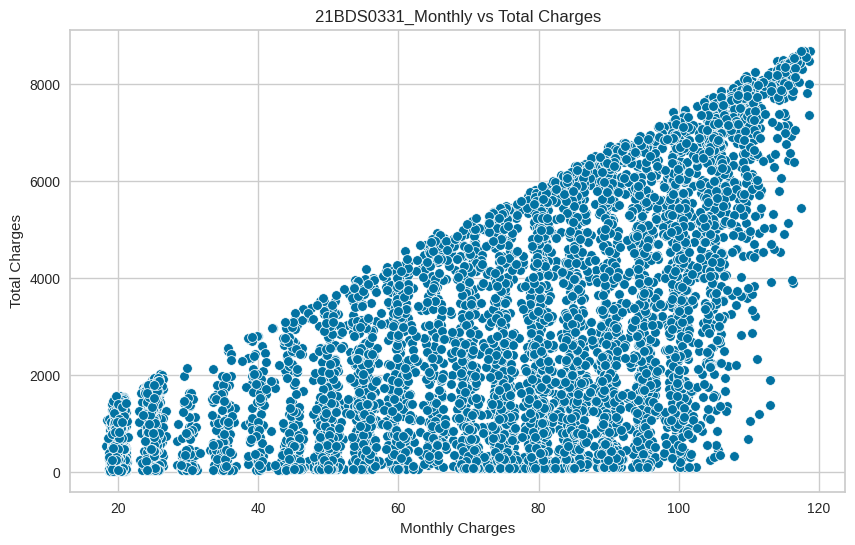

<ipython-input-36-7df1c3c77fc7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="coolwarm")


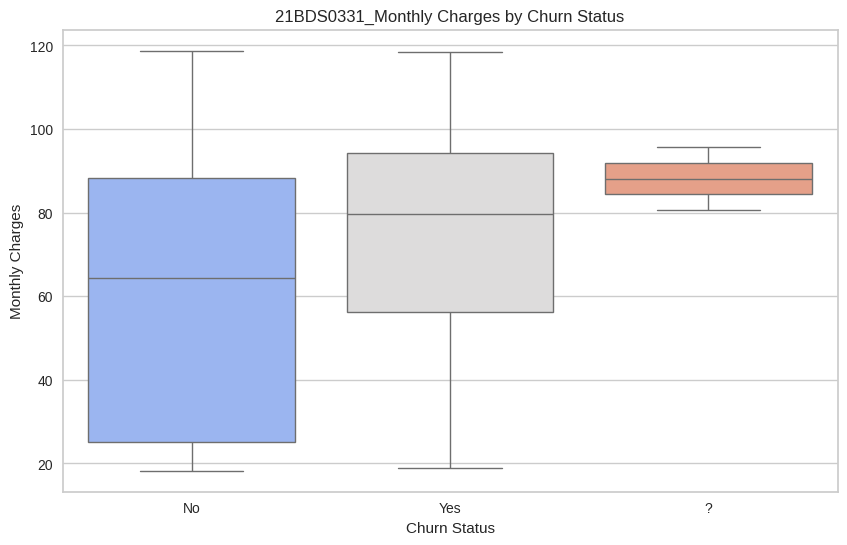

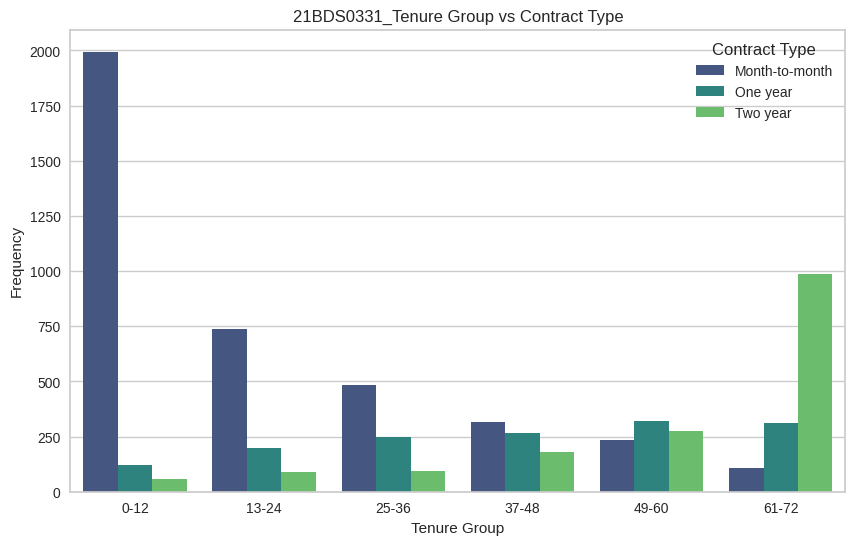

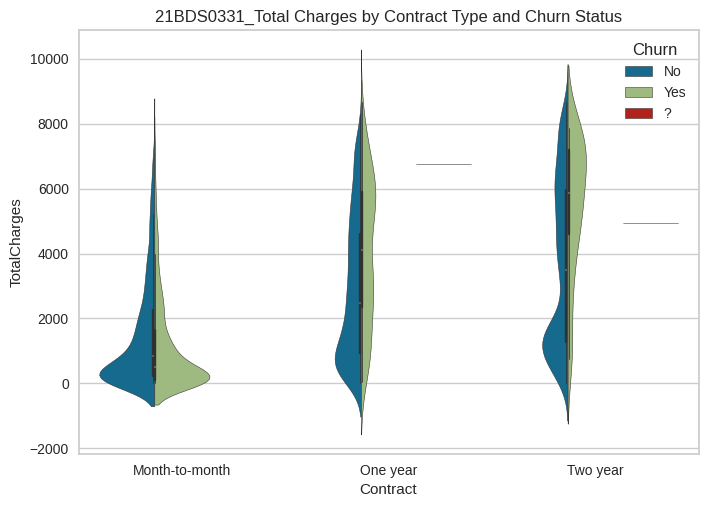

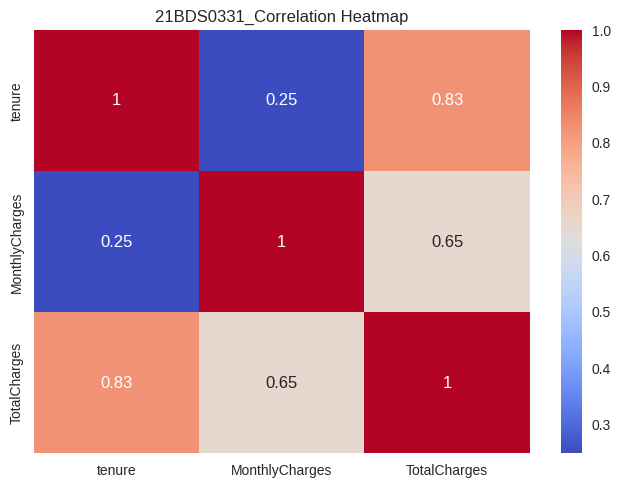

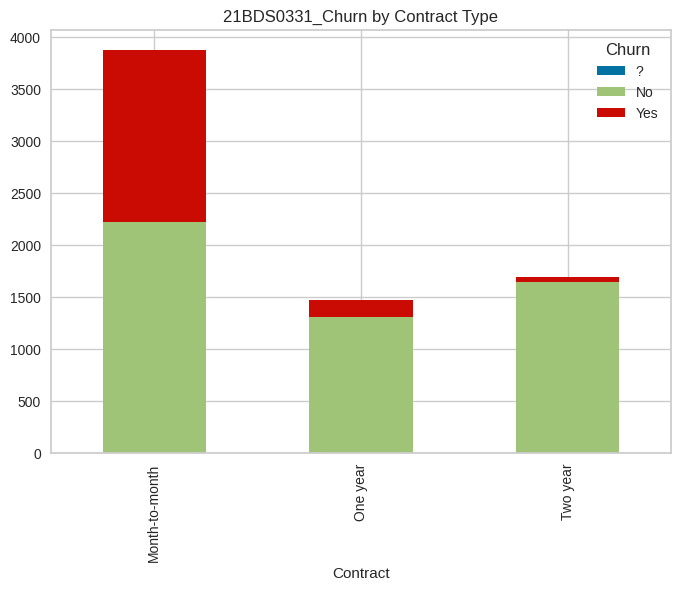

In [36]:
# Bivariate Analysis of Monthly Charges vs. Total Charges (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title("21BDS0331_Monthly vs Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.show()

# Bivariate Analysis of Tenure vs. Monthly Charges by Churn Status (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="coolwarm")
plt.title("21BDS0331_Monthly Charges by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Monthly Charges")
plt.show()

# Bivariate Analysis: Tenure Group vs. Contract Type (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='tenure_group', hue='Contract', data=df, palette="viridis")
plt.title("21BDS0331_Tenure Group vs Contract Type")
plt.xlabel("Tenure Group")
plt.ylabel("Frequency")
plt.legend(title="Contract Type")
plt.show()

# Violin Plot for distribution across categories (e.g., 'Contract' and 'Churn')
sns.violinplot(x='Contract', y='TotalCharges', hue='Churn', split=True, data=df)
plt.title('21BDS0331_Total Charges by Contract Type and Churn Status')
plt.show()

# Correlation Heatmap
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('21BDS0331_Correlation Heatmap')
plt.show()

# Stacked Bar Chart (e.g., 'Contract' and 'Churn')
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar', stacked=True)
plt.title('21BDS0331_Churn by Contract Type')
plt.show()




## ***3. Multivariate Analysis***

<Figure size 1000x600 with 0 Axes>

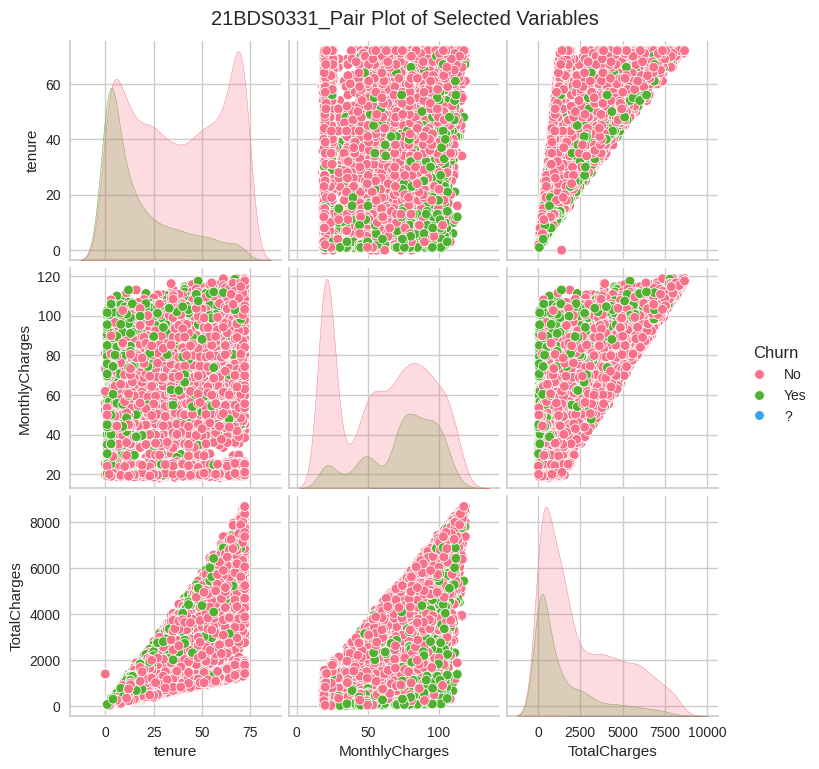

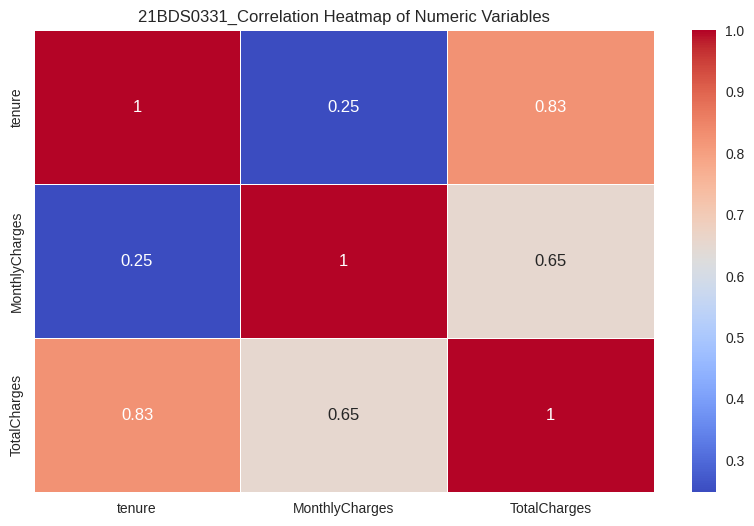

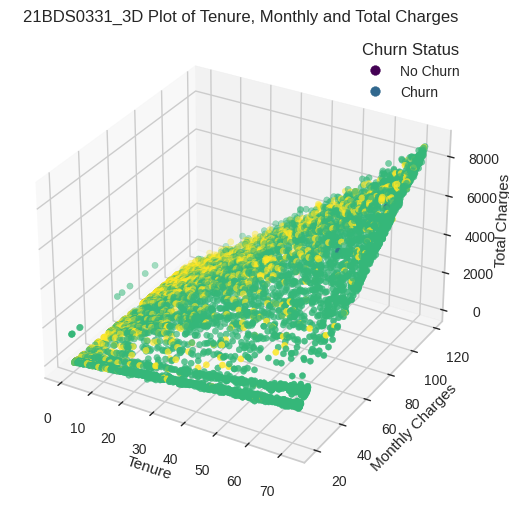

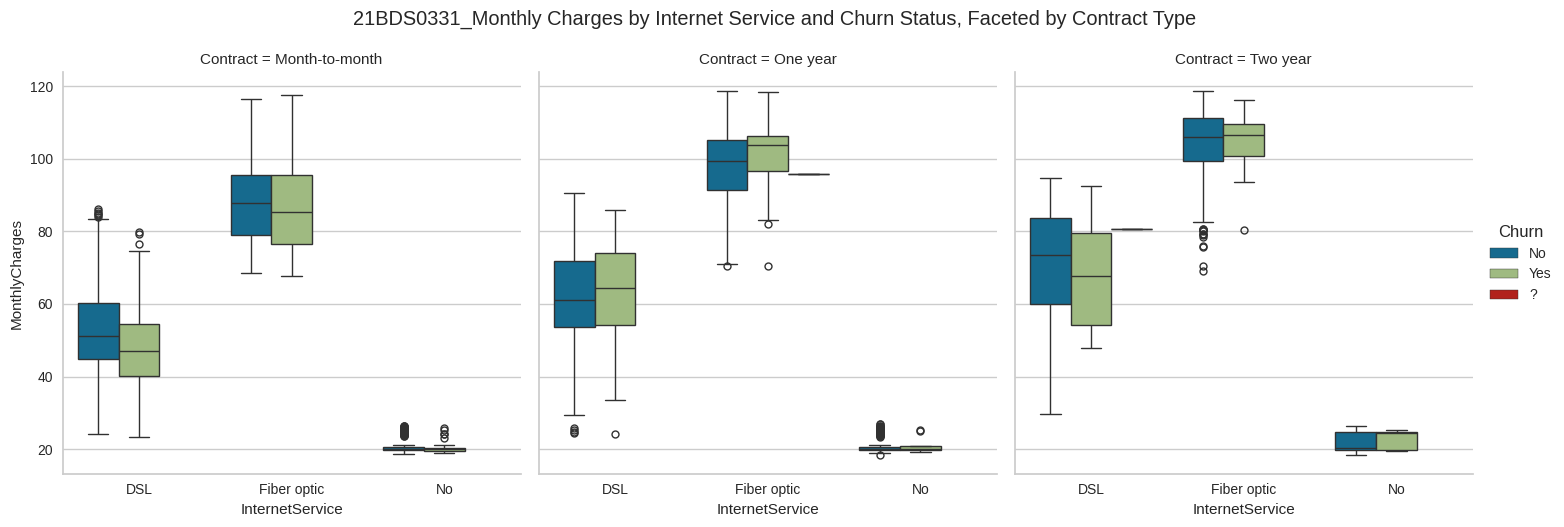

In [37]:
# Multivariate Analysis: Pair Plot for Numeric Variables
plt.figure(figsize=(10, 6))
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette="husl")
plt.suptitle("21BDS0331_Pair Plot of Selected Variables", y=1.02)
plt.show()

# Multivariate Analysis: Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("21BDS0331_Correlation Heatmap of Numeric Variables")
plt.show()

# Multivariate Analysis: 3D Scatter Plot of Tenure, Monthly Charges, and Total Charges
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['tenure'], df['MonthlyCharges'], df['TotalCharges'], c=pd.Categorical(df['Churn']).codes, cmap='viridis')
ax.set_xlabel("Tenure")
ax.set_ylabel("Monthly Charges")
ax.set_zlabel("Total Charges")
plt.title("21BDS0331_3D Plot of Tenure, Monthly and Total Charges")
plt.legend(handles=scatter.legend_elements()[0], labels=['No Churn', 'Churn'], title="Churn Status")
plt.show()

# Factor Plot for numerical by categorical with hue and col (e.g., 'InternetService', 'Contract', 'Churn')
g = sns.catplot(x='InternetService', y='MonthlyCharges', hue='Churn', col='Contract', data=df, kind='box')
g.fig.suptitle('21BDS0331_Monthly Charges by Internet Service and Churn Status, Faceted by Contract Type', y=1.05)  # Adjust the y position if needed
plt.show()

# **Module 4: Data Summarization and Visualization**

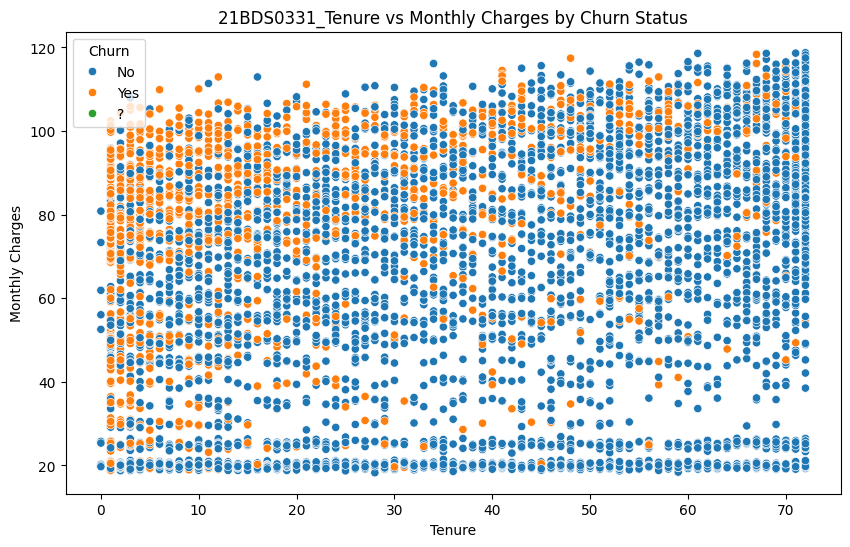

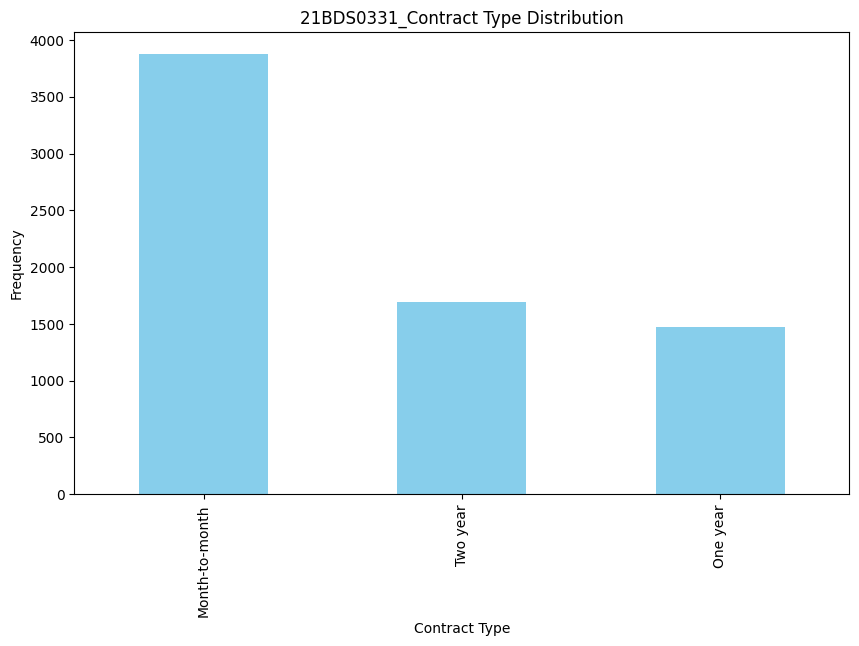

In [11]:
# Scatter plot example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title("21BDS0331_Tenure vs Monthly Charges by Churn Status")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.show()

# Bar plot example: Churn by contract type
plt.figure(figsize=(10, 6))
df['Contract'].value_counts().plot(kind='bar', color='skyblue')
plt.title("21BDS0331_Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Frequency")
plt.show()


**a. Contingency Table**

Churn            ?    No   Yes
InternetService               
DSL              1  1961   458
Fiber optic      1  1798  1297
No               0  1413   113


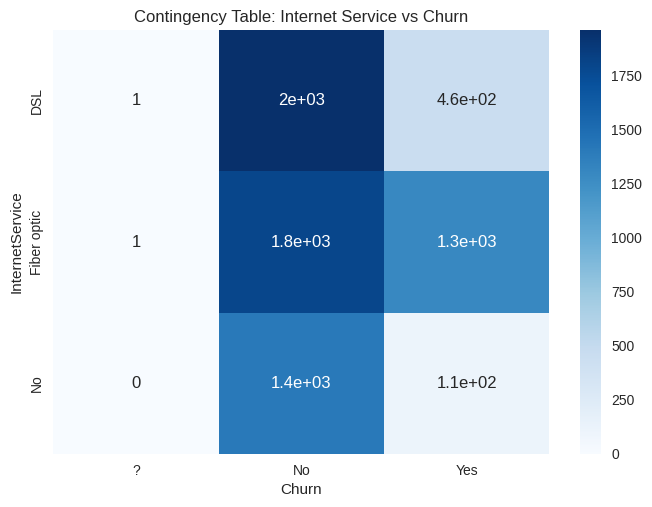

In [38]:
# Create a contingency table for InternetService vs Churn
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])
print(contingency_table)

# Heatmap to visualize the contingency table
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title('Contingency Table: Internet Service vs Churn')
plt.show()

In [47]:
# Chi-square test for independence
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test statistic: {chi2}, p-value: {p}")


Chi-square test statistic: 733.9744112321948, p-value: 1.5321962355181874e-157


**b. 3D Scatter plot for tenure, MonthlyCharges, and TotalCharges**


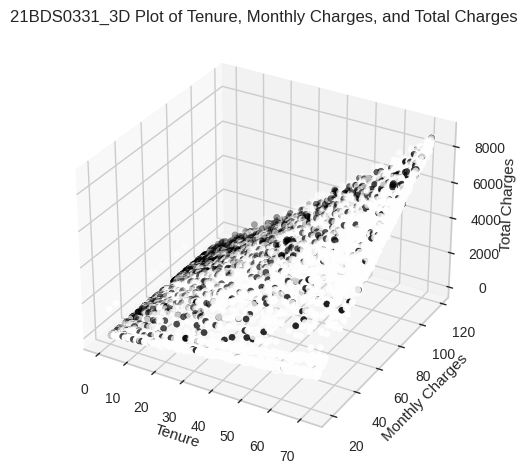

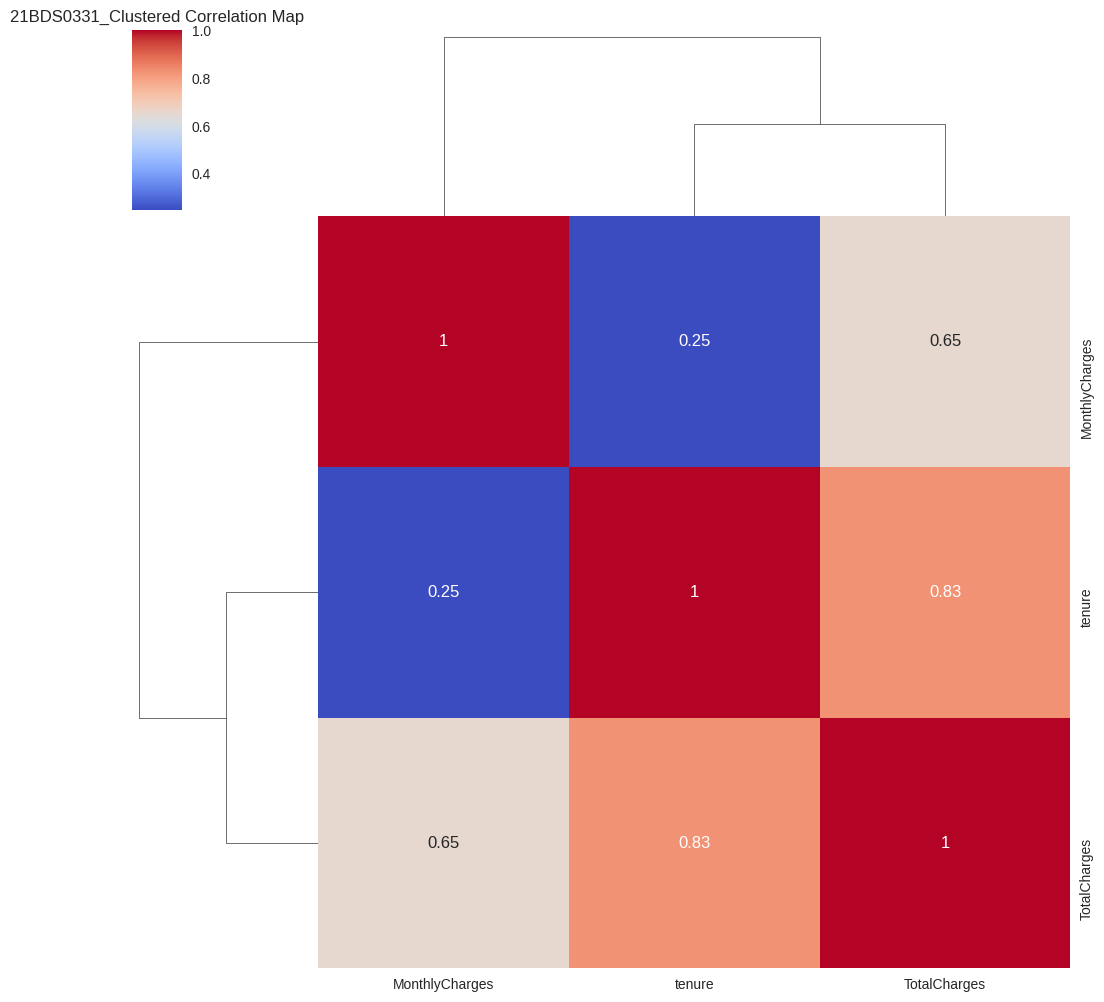

In [40]:
# 3D Scatter plot for tenure, MonthlyCharges, and TotalCharges
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['tenure'], df['MonthlyCharges'], df['TotalCharges'], c=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0))
ax.set_xlabel('Tenure')
ax.set_ylabel('Monthly Charges')
ax.set_zlabel('Total Charges')
plt.title('21BDS0331_3D Plot of Tenure, Monthly Charges, and Total Charges')
plt.show()

# Cluster Map of correlation among numerical variables
sns.clustermap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('21BDS0331_Clustered Correlation Map')
plt.show()

***c. Triangle plot***

In [44]:
import pandas as pd
import plotly.express as px

# Assuming 'tenure' as 'age', 'MonthlyCharges' as 'risk', and 'Churn' as 'outcome'
df1 = data_deduplicated[['tenure', 'MonthlyCharges', 'Churn']].dropna()  # Ensure no NaN values in the selected columns

# Create a ternary plot
fig = px.scatter_ternary(df1,
                         a='tenure',         # Maps to 'age'
                         b='MonthlyCharges',  # Maps to 'risk'
                         c='Churn',          # Maps to 'outcome'
                         size_max=15,
                         title='21BDS0331_Ternary Plot (Triangular Diagram) of Tenure, Monthly Charges, and Churn')

# Show the plot
fig.show()

***d. Ogive plot***

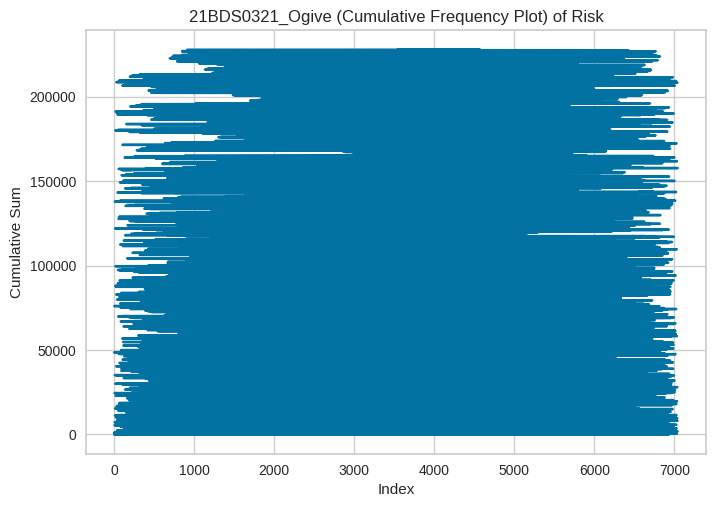

In [49]:
# Ogive for a numeric variable (replace 'Var1' with actual column name)
sorted_data = df['tenure'].sort_values()
cumulative = sorted_data.cumsum()
plt.plot(cumulative.index, cumulative.values)
plt.title('21BDS0321_Ogive (Cumulative Frequency Plot) of Risk')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.show()


***e. Sunray plot***

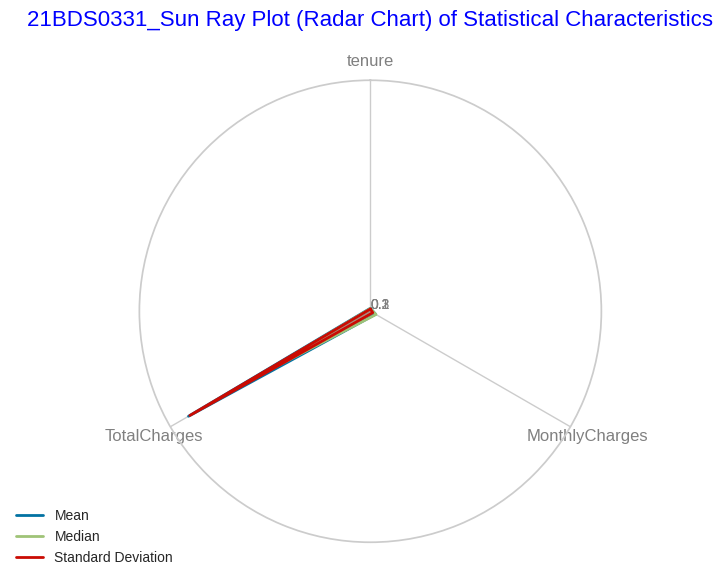

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Columns to analyze, updated with the assumed column names
columns_to_analyze = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Adjust based on actual column meanings

# Calculate statistical characteristics (mean, median, std)
mean_vals = df[columns_to_analyze].mean()
median_vals = df[columns_to_analyze].median()
std_vals = df[columns_to_analyze].std()

# Combine into a single dataframe for easy plotting
stats_df = pd.DataFrame({
    'Mean': mean_vals,
    'Median': median_vals,
    'Standard Deviation': std_vals
})

# Number of variables to plot
num_vars = len(stats_df)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the circle

# Radar chart setup
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# First axis goes on top (rotate the chart)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Labels for each variable
plt.xticks(angles[:-1], stats_df.index, color='grey', size=12)

# Draw y-labels
ax.set_rlabel_position(0)
plt.yticks([0.1, 0.2, 0.3], ["0.1", "0.2", "0.3"], color="grey", size=10)
plt.ylim(0, max(stats_df.max()) * 1.1)

# Plot each characteristic
for i, col in enumerate(stats_df.columns):
    values = stats_df[col].values.flatten().tolist()
    values += values[:1]  # Complete the circle
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=col)
    ax.fill(angles, values, alpha=0.25)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Title
plt.title('21BDS0331_Sun Ray Plot (Radar Chart) of Statistical Characteristics', size=16, color='blue', y=1.1)

plt.show()

***f. Dispersion Box Plots of Numeric Variables***

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Columns to analyze, updated with the assumed column names
columns_to_analyze = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Adjust based on actual column meanings

# Calculate statistical characteristics (mean, median, std)
mean_vals = df_converted[columns_to_analyze].mean()
median_vals = df_converted[columns_to_analyze].median()
std_vals = df_converted[columns_to_analyze].std()

# Combine into a single dataframe for easy plotting
stats_df = pd.DataFrame({
    'Mean': mean_vals,
    'Median': median_vals,
    'Standard Deviation': std_vals
})

# Number of variables to plot
num_vars = len(stats_df)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the circle

# Radar chart setup
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# First axis goes on top (rotate the chart)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Labels for each variable
plt.xticks(angles[:-1], stats_df.index, color='grey', size=12)

# Draw y-labels
ax.set_rlabel_position(0)
plt.yticks([0.1, 0.2, 0.3], ["0.1", "0.2", "0.3"], color="grey", size=10)
plt.ylim(0, max(stats_df.max()) * 1.1)

# Plot each characteristic
for i, col in enumerate(stats_df.columns):
    values = stats_df[col].values.flatten().tolist()
    values += values[:1]  # Complete the circle
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=col)
    ax.fill(angles, values, alpha=0.25)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Title
plt.title('21BDS0331_Sun Ray Plot (Radar Chart) of Statistical Characteristics', size=16, color='blue', y=1.1)

plt.show()

NameError: name 'df_converted' is not defined

# **Module 5: Clustering Algorithms**

**a. Hierarchical Clustering**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7035 non-null   float64 
 3   Partner           7038 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7041 non-null   float64 
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

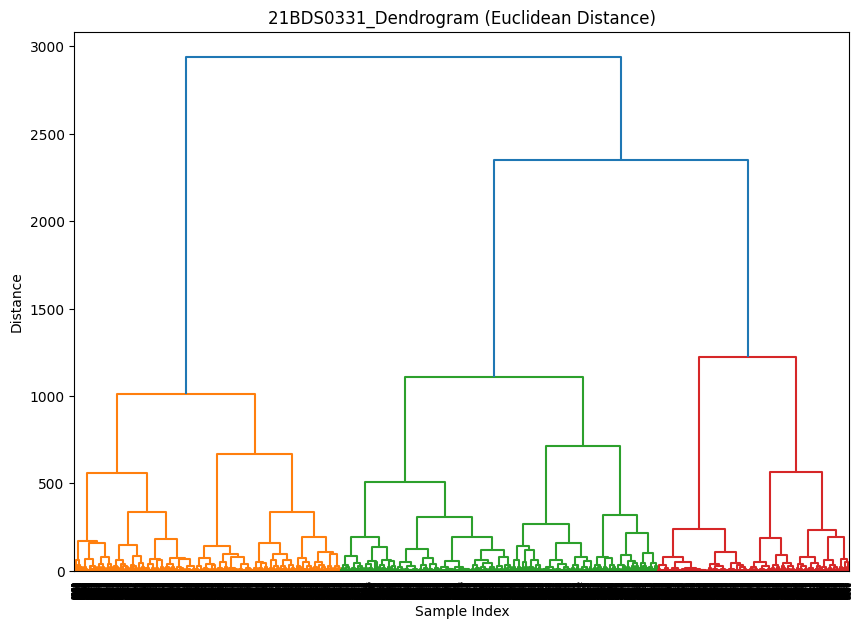

In [12]:
# Import necessary libraries
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Selecting relevant columns ('MonthlyCharges' and 'tenure')
df_selected = df[['MonthlyCharges', 'tenure']]

# Check for missing values and handle them
if df_selected.isna().sum().sum() > 0:
    # Option 1: Remove rows with missing values
    df_selected = df_selected.dropna()

    # Option 2: Impute missing values with column means (uncomment if desired)
    # df_selected.fillna(df_selected.mean(), inplace=True)

# Display basic statistical summary after preprocessing
print(df_selected.describe())

# Compute distance matrix (using 'euclidean' as the distance measure)
dist_matrix = pdist(df_selected, metric='euclidean')

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(dist_matrix, method='ward')

# Visualize dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("21BDS0331_Dendrogram (Euclidean Distance)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

**b. K-Means**

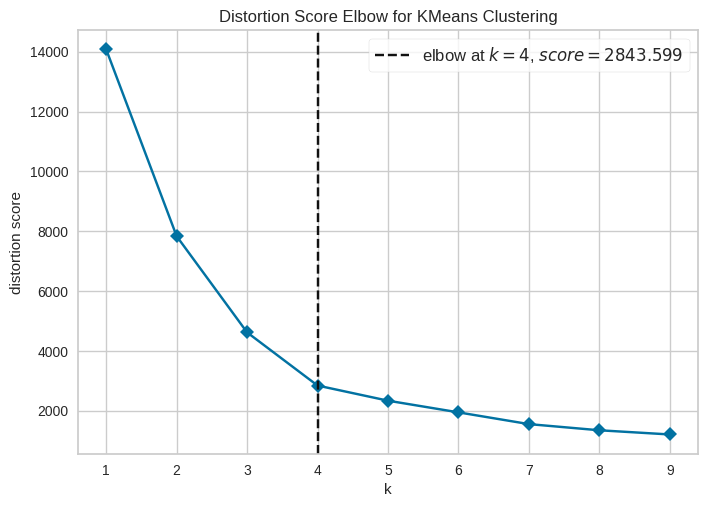

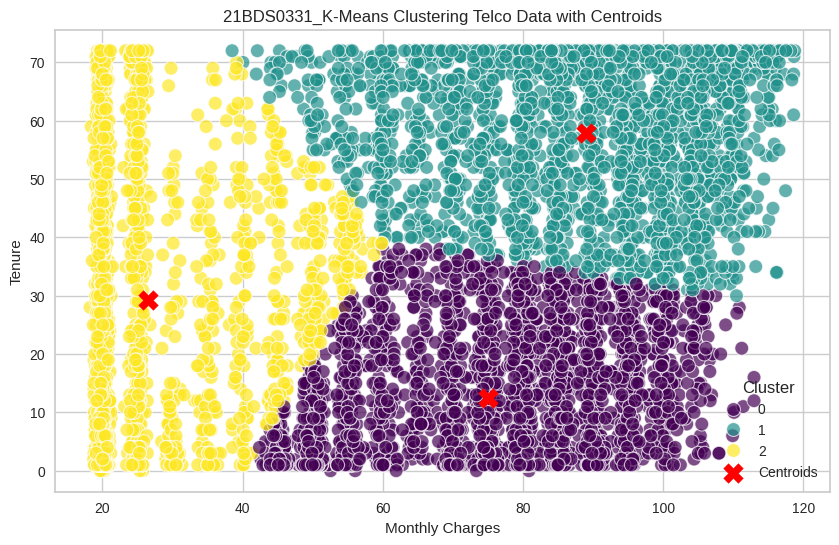

Cluster Centers (in original scale):
[[74.99249904 12.5510907 ]
 [88.96784151 57.92732049]
 [26.47891172 29.29051845]]
Labels assigned to each data point:
[2 2 0 ... 2 0 1]


In [55]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Select relevant columns and ensure numeric type
# Columns: 'MonthlyCharges' and 'tenure'
dataset = df[['MonthlyCharges', 'tenure']].dropna()
dataset = dataset.apply(pd.to_numeric)  # Ensure all data is numeric

# Standardize the data for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)

# Determine the optimal number of clusters using the Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(data_scaled)
visualizer.show()  # Display Elbow plot

# Set the number of clusters based on the Elbow plot
num_clusters = 3  # Adjust based on the Elbow method output

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=123, n_init=25)
kmeans.fit(data_scaled)

# Add the cluster labels to the dataset
dataset['Cluster'] = kmeans.labels_

# Reverse transform cluster centers to the original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualize K-means clustering with centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='MonthlyCharges', y='tenure', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')  # Plot centroids
plt.title("21BDS0331_K-Means Clustering Telco Data with Centroids")
plt.xlabel("Monthly Charges")
plt.ylabel("Tenure")
plt.legend(title='Cluster')
plt.show()  # Display clustering plot with centroids

# Print the clustering results (centroids and labels)
print("Cluster Centers (in original scale):")
print(centroids)
print("Labels assigned to each data point:")
print(kmeans.labels_)

# **Module 6: Dimensionality Reduction (PCA)**

<class 'pandas.core.frame.DataFrame'>
Index: 7038 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  7038 non-null   float64
 1   tenure          7038 non-null   float64
dtypes: float64(2)
memory usage: 165.0 KB
None
       MonthlyCharges       tenure
count     7038.000000  7038.000000
mean        64.769722    32.368997
std         30.087391    24.560062
min         18.250000     0.000000
25%         35.512500     9.000000
50%         70.350000    29.000000
75%         89.850000    55.000000
max        118.750000    72.000000
Explained Variance by each component: [0.62397948 0.37602052]


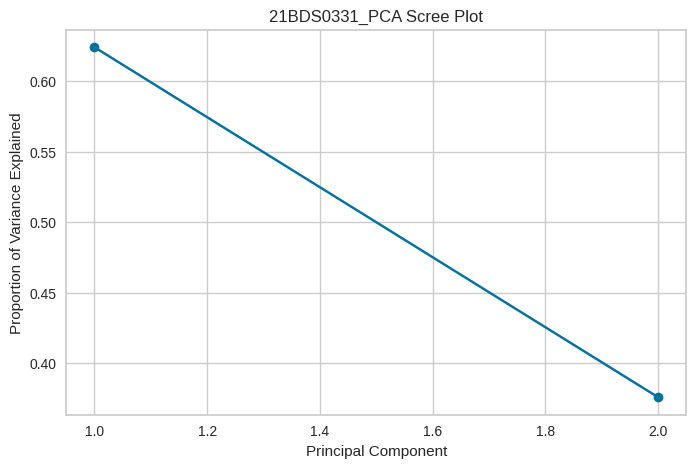

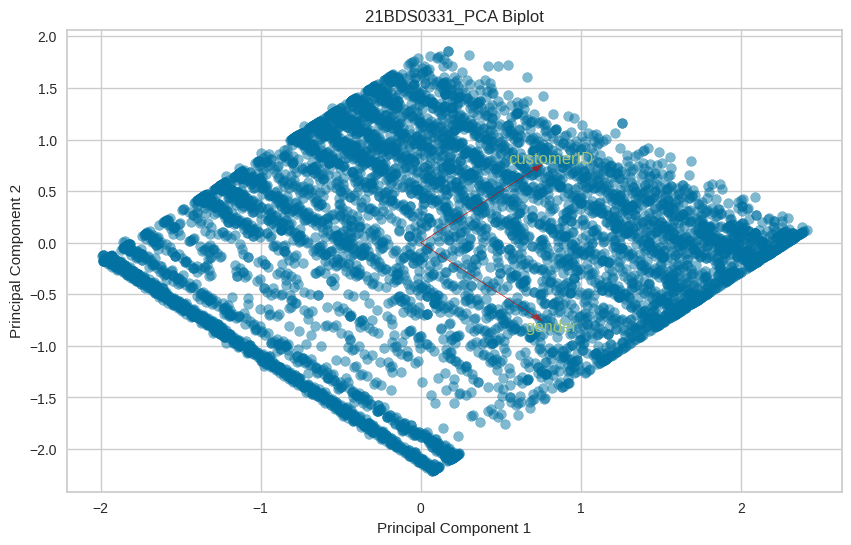

In [54]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant columns for PCA and ensure they are numeric
pca_data = df[['MonthlyCharges', 'tenure']].dropna()
pca_data = pca_data.apply(pd.to_numeric)  # Convert columns to numeric

# Check the structure and summary of the data
print(pca_data.info())
print(pca_data.describe())

# Standardize the data for PCA
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Perform PCA
pca = PCA()
pca_result = pca.fit(pca_data_scaled)

# Summary of PCA - Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each component:", explained_variance)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.title("21BDS0331_PCA Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.grid(True)
plt.show()

# Biplot for the first two principal components
pca_data_transformed = pca.transform(pca_data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data_transformed[:, 0], pca_data_transformed[:, 1], alpha=0.5, c='b', s=50)
for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.7, head_width=0.05)
    plt.text(pc1 * 1.15, pc2 * 1.15, df.columns[i], color='g', ha='center', va='center')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("21BDS0331_PCA Biplot")
plt.grid(True)
plt.show()

Explained Variance by Each Component:
 [0.72665529 0.2532384  0.0201063 ]


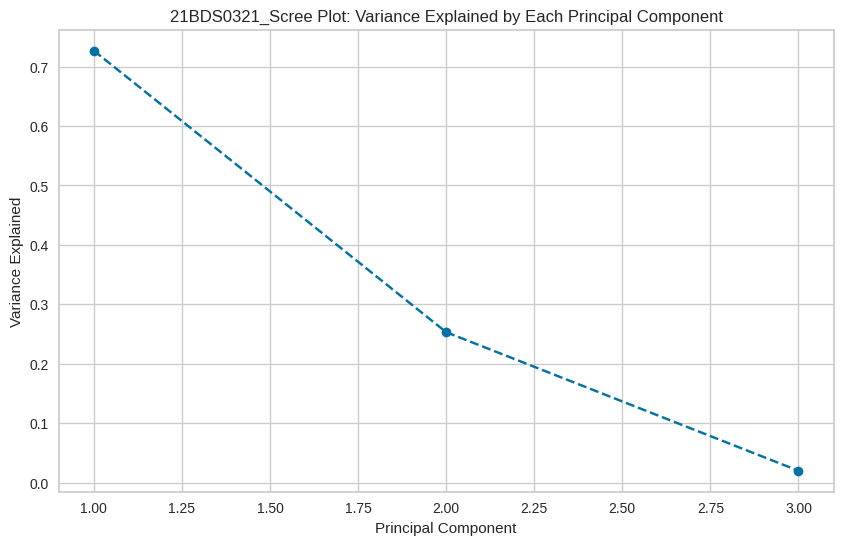

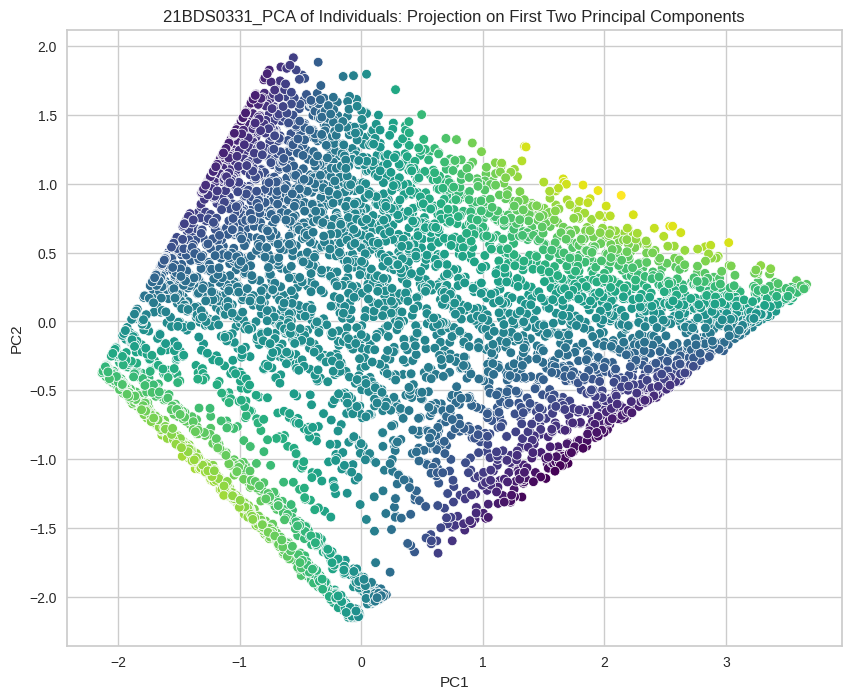

In [57]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select the numeric columns for PCA
columns_to_use = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_numeric = df[columns_to_use].dropna()  # Ensure no NaN values

# Scale the numeric data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Perform PCA
pca = PCA()
pca_result = pca.fit(df_scaled)

# Display a summary of PCA to see variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Each Component:\n", explained_variance)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title("21BDS0321_Scree Plot: Variance Explained by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

# Projection of individuals on the first two principal components
pca_transformed = pca.transform(df_scaled)
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(len(explained_variance))])

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=pca_df['PC1'] * pca_df['PC2'], palette="viridis", legend=None)
plt.title("21BDS0331_PCA of Individuals: Projection on First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


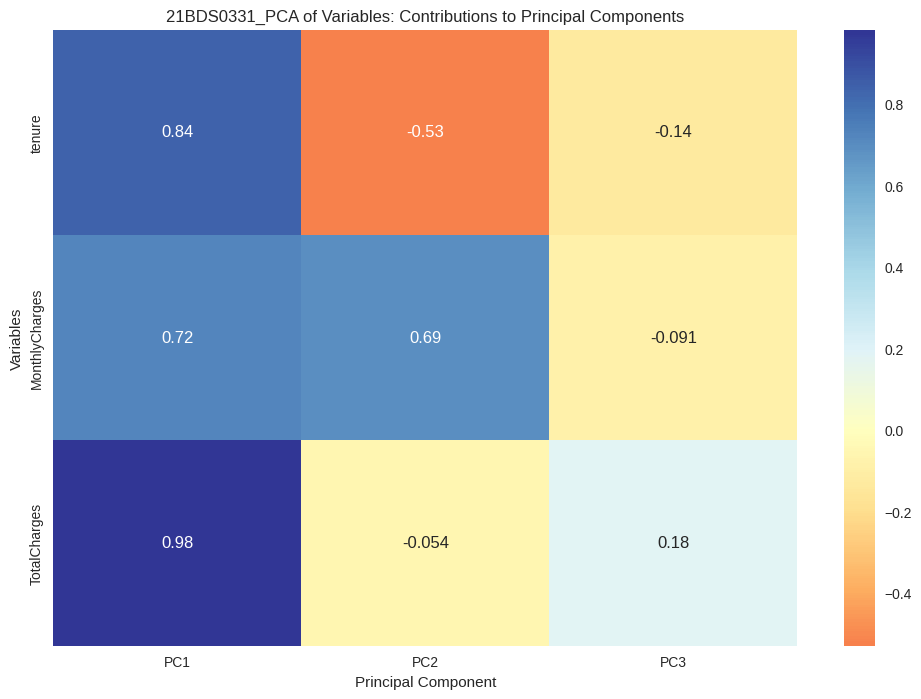

In [59]:
# Contributions of variables to the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(explained_variance))], index=df_numeric.columns)
plt.figure(figsize=(12, 8))
sns.heatmap(loading_df, cmap="RdYlBu", center=0, annot=True)
plt.title("21BDS0331_PCA of Variables: Contributions to Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variables")
plt.show()
